In [4]:
# import the libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
from tensorflow import keras
# import tsgm
import pandas as pd
import datetime
import random


In [5]:
import os
os.environ['TF_USE_LEGACY_KERAS'] = 'True'

In [6]:
data_df = pd.read_csv('cleaned.csv')
data_df

,lat,lon,time,stop,next_stop,elapsed,time_Seconds,round_trip
0,18.403981,-66.046373,8:42:35,5.0,6.0,NaN,31355,NaN
1,18.404105,-66.048489,8:43:13,6.0,13.0,38.0,31393,NaN
2,18.404201,-66.049903,8:43:56,13.0,24.0,43.0,31436,NaN
3,18.405122,-66.050338,8:44:52,24.0,23.0,56.0,31492,NaN
4,18.406180,-66.050259,8:45:22,23.0,20.0,30.0,31522,NaN
...,...,...,...,...,...,...,...,...
331,18.403958,-66.049795,11:40:9,13.0,24.0,29.0,42009,867.0
332,18.404569,-66.050380,11:40:57,24.0,23.0,48.0,42057,859.0
333,18.406081,-66.050287,11:41:18,23.0,20.0,21.0,42078,846.0
334,18.406994,-66.049228,11:41:51,20.0,19.0,33.0,42111,830.0


### count stops and order by timestamp

In [22]:
data_df.groupby('stop').count()

,lat,lon,time,next_stop,elapsed,time_Seconds,round_trip
stop,,,,,,,
1.0,20,20,20,20,19,20,13
2.1,42,42,42,42,41,42,11
3.0,18,18,18,18,18,18,9
4.0,23,23,23,23,22,23,12
5.0,26,26,26,26,21,26,16
6.0,25,25,25,25,23,25,17
9.0,22,22,22,22,22,22,14
10.0,21,21,21,21,21,21,14
11.0,23,23,23,23,23,23,14


In [23]:
## order by time_Seconds
data_df.sort_values(by=['time_Seconds'], inplace=True)
data_df


,lat,lon,time,stop,next_stop,elapsed,time_Seconds,round_trip
130,18.403841,-66.046706,8:19:38,5.0,6.0,NaN,29978,NaN
131,18.404050,-66.048058,8:20:25,6.0,13.0,47.0,30025,NaN
132,18.404023,-66.049806,8:21:32,13.0,24.0,67.0,30092,NaN
133,18.406571,-66.050025,8:23:9,23.0,20.0,97.0,30189,NaN
134,18.406986,-66.049301,8:23:37,20.0,19.0,28.0,30217,NaN
...,...,...,...,...,...,...,...,...
227,18.406167,-66.043272,14:42:46,2.1,1.0,268.0,52966,NaN
228,18.407040,-66.042000,14:43:22,1.0,2.2,36.0,53002,NaN
229,18.406225,-66.043042,14:45:14,2.1,1.0,112.0,53114,NaN
230,18.403648,-66.045337,14:48:24,4.0,5.0,190.0,53304,NaN


In [61]:
## see amount of stops per timestamp
##

## Create each time stamp, starting by 8, then 9
list_of_timestamps = [28800]
for i in range(8):
    list_of_timestamps.append(list_of_timestamps[-1]+3600)
list_of_timestamps


## then print group
for i in range(len(list_of_timestamps)-1):
    print(data_df[(data_df['time_Seconds']>=list_of_timestamps[i]) & (data_df['time_Seconds']<list_of_timestamps[i+1])].groupby('stop').count())

      lat  lon  time  next_stop  elapsed  time_Seconds  round_trip
stop                                                              
1.0     3    3     3          3        3             3           1
2.1     9    9     9          9        9             9           1
3.0     4    4     4          4        4             4           1
4.0     3    3     3          3        2             3           0
5.0     8    8     8          8        5             8           2
6.0     7    7     7          7        7             7           2
9.0     5    5     5          5        5             5           2
10.0    5    5     5          5        5             5           2
11.0    5    5     5          5        5             5           2
13.0    7    7     7          7        6             7           3
19.0    4    4     4          4        4             4           2
20.0    6    6     6          6        6             6           2
23.0    4    4     4          4        4             4        

In [62]:
## 
data_df.groupby('stop').count()

,lat,lon,time,next_stop,elapsed,time_Seconds,round_trip
stop,,,,,,,
1.0,20,20,20,20,19,20,13
2.1,42,42,42,42,41,42,11
3.0,18,18,18,18,18,18,9
4.0,23,23,23,23,22,23,12
5.0,26,26,26,26,21,26,16
6.0,25,25,25,25,23,25,17
9.0,22,22,22,22,22,22,14
10.0,21,21,21,21,21,21,14
11.0,23,23,23,23,23,23,14


### Now we separate elapsed time perstop, 
### we also separate per timestamp eper stop

In [63]:
## indexes we havev 15 paradas desde el 15 son, 0-60 y 201-231
import math
## for 0-60 we use this code
global_data_per_stop = {}


## global average per stop Per hour
global_data_per_stop_per_hour = {}






def get_average_elapse_per_stop(data_df,list_of_timestamps):


    for i in range(len(list_of_timestamps)-1):
        dataset_to_use = data_df[(data_df['time_Seconds']>=list_of_timestamps[i]) & (data_df['time_Seconds']<list_of_timestamps[i+1])]
        timestamp = list_of_timestamps[i]
        if timestamp not in global_data_per_stop_per_hour:
            global_data_per_stop_per_hour[timestamp] = {}
        for i,r in dataset_to_use.iterrows():
            elapsed_time =  r['elapsed']
            
            if(math.isnan(elapsed_time)):
                continue
            if(r['stop'] not in global_data_per_stop):
                global_data_per_stop[r['stop']] = {
                    'sum':0,
                    'elapsed_per_stop':[]
                }
            global_data_per_stop[r['stop']]['elapsed_per_stop'].append(elapsed_time)
            global_data_per_stop[r['stop']]['sum'] += elapsed_time

            if(r['stop'] not in global_data_per_stop_per_hour[timestamp]):
                global_data_per_stop_per_hour[timestamp][r['stop']] = {
                    'sum':0,
                    'elapsed_per_stop':[]
                }
            global_data_per_stop_per_hour[timestamp][r['stop']]['elapsed_per_stop'].append(elapsed_time)
            global_data_per_stop_per_hour[timestamp][r['stop']]['sum'] += elapsed_time

            # if(r['stop'] not in global_average_per_stop_per_hour):
            #     global_average_per_stop_per_hour[r['stop']] = {
            #         'sum':0,
            #         'elapsed_per_stop':[]
            #     }
            # global_average_per_stop_per_hour[r['stop']]['elapsed_per_stop'].append(elapsed_time)
            # global_average_per_stop_per_hour[r['stop']]['sum'] += elapsed_time



    # for i,r in data_df.iterrows():

    #     index = i + offset
    #     elapsed_time =  data_df[data_df.index==i]['elapsed'].values[0]
    #     print(elapsed_time)

    #     if(math.isnan(elapsed_time)):
    #         continue
    #     if(index%15 not in global_average_per_elapse_stop):
    #         global_average_per_elapse_stop[index%15] = {
    #             'sum':0,
    #             'elapsed_per_stop':[]
    #         }
    #     global_average_per_elapse_stop[index%15]['elapsed_per_stop'].append(elapsed_time)
    #     global_average_per_elapse_stop[index%15]['sum'] += elapsed_time



            


    # if(index%15 not in global_average_per_elapse_stop):
    #     global_average_per_elapse_stop[index%15] = 


get_average_elapse_per_stop(data_df, list_of_timestamps)





In [64]:


for key in global_data_per_stop:
    print(key)
    print(global_data_per_stop[key]['sum'])
    print(global_data_per_stop[key]['elapsed_per_stop'])

for key in global_data_per_stop_per_hour:
    print(key)
    print(global_data_per_stop_per_hour[key])
# print(global_data_per_stop)
# print(global_data_per_stop_per_hour)
# global_average_per_elapse_stop
# #checking length of each row
# for key in global_average_per_elapse_stop:
#     print(len(global_average_per_elapse_stop[key]['elapsed_per_stop']))

6.0
854.0
[47.0, 39.0, 30.0, 38.0, 26.0, 29.0, 40.0, 37.0, 27.0, 74.0, 30.0, 32.0, 38.0, 46.0, 44.0, 24.0, 28.0, 43.0, 33.0, 51.0, 27.0, 46.0, 25.0]
13.0
1017.0
[67.0, 81.0, 30.0, 43.0, 34.0, 54.0, 48.0, 27.0, 39.0, 57.0, 33.0, 37.0, 65.0, 39.0, 20.0, 18.0, 71.0, 29.0, 54.0, 28.0, 37.0, 31.0, 46.0, 29.0]
23.0
969.0
[97.0, 47.0, 40.0, 30.0, 31.0, 30.0, 18.0, 25.0, 27.0, 62.0, 27.0, 34.0, 33.0, 22.0, 96.0, 31.0, 46.0, 45.0, 54.0, 36.0, 30.0, 34.0, 21.0, 53.0]
20.0
864.0
[28.0, 21.0, 28.0, 37.0, 17.0, 67.0, 21.0, 15.0, 26.0, 21.0, 24.0, 97.0, 40.0, 104.0, 52.0, 31.0, 38.0, 28.0, 44.0, 49.0, 33.0, 43.0]
19.0
608.0
[32.0, 43.0, 20.0, 24.0, 14.0, 26.0, 22.0, 28.0, 21.0, 21.0, 27.0, 37.0, 26.0, 25.0, 23.0, 52.0, 33.0, 32.0, 21.0, 23.0, 32.0, 26.0]
9.0
632.0
[31.0, 9.0, 22.0, 31.0, 34.0, 47.0, 25.0, 18.0, 18.0, 18.0, 27.0, 23.0, 43.0, 18.0, 38.0, 18.0, 67.0, 29.0, 31.0, 25.0, 42.0, 18.0]
10.0
814.0
[24.0, 41.0, 163.0, 29.0, 30.0, 36.0, 57.0, 29.0, 43.0, 15.0, 30.0, 30.0, 46.0, 29.0, 24.0, 22.0

In [65]:
## removing exceptions
# global_average_per_elapse_stop[3]['elapsed_per_stop'] = global_average_per_elapse_stop[3]['elapsed_per_stop'][:-1]

for key in global_data_per_stop:
    x = 0 
    global_data_per_stop[key]['sum'] = sum(global_data_per_stop[key]['elapsed_per_stop'])
    global_data_per_stop[key]['average'] = sum(global_data_per_stop[key]['elapsed_per_stop'])/len(global_data_per_stop[key]['elapsed_per_stop'])
    global_data_per_stop[key]['standard_deviation'] = np.std(global_data_per_stop[key]['elapsed_per_stop'])

for key in global_data_per_stop_per_hour:
    for stop in global_data_per_stop_per_hour[key]:
        x = 0 
        global_data_per_stop_per_hour[key][stop]['sum'] = sum(global_data_per_stop_per_hour[key][stop]['elapsed_per_stop'])
        global_data_per_stop_per_hour[key][stop]['average'] = sum(global_data_per_stop_per_hour[key][stop]['elapsed_per_stop'])/len(global_data_per_stop_per_hour[key][stop]['elapsed_per_stop'])
        global_data_per_stop_per_hour[key][stop]['standard_deviation'] = np.std(global_data_per_stop_per_hour[key][stop]['elapsed_per_stop'])
# for key in global_average_per_elapse_stop:
#     x = 0 
#     global_average_per_elapse_stop[key]['sum'] = sum(global_average_per_elapse_stop[key]['elapsed_per_stop'])
#     global_average_per_elapse_stop[key]['average'] = sum(global_average_per_elapse_stop[key]['elapsed_per_stop'])/len(global_average_per_elapse_stop[key]['elapsed_per_stop'])
#     global_average_per_elapse_stop[key]['standard_deviation'] = np.std(global_average_per_elapse_stop[key]['elapsed_per_stop'])
# global_average_per_elapse_stop

## printing new dictS

In [66]:
global_data_per_stop, global_data_per_stop_per_hour

({6.0: {'sum': 854.0,
   'elapsed_per_stop': [47.0,
    39.0,
    30.0,
    38.0,
    26.0,
    29.0,
    40.0,
    37.0,
    27.0,
    74.0,
    30.0,
    32.0,
    38.0,
    46.0,
    44.0,
    24.0,
    28.0,
    43.0,
    33.0,
    51.0,
    27.0,
    46.0,
    25.0],
   'average': 37.130434782608695,
   'standard_deviation': 11.12108982705377},
  13.0: {'sum': 1017.0,
   'elapsed_per_stop': [67.0,
    81.0,
    30.0,
    43.0,
    34.0,
    54.0,
    48.0,
    27.0,
    39.0,
    57.0,
    33.0,
    37.0,
    65.0,
    39.0,
    20.0,
    18.0,
    71.0,
    29.0,
    54.0,
    28.0,
    37.0,
    31.0,
    46.0,
    29.0],
   'average': 42.375,
   'standard_deviation': 16.298804915289548},
  23.0: {'sum': 969.0,
   'elapsed_per_stop': [97.0,
    47.0,
    40.0,
    30.0,
    31.0,
    30.0,
    18.0,
    25.0,
    27.0,
    62.0,
    27.0,
    34.0,
    33.0,
    22.0,
    96.0,
    31.0,
    46.0,
    45.0,
    54.0,
    36.0,
    30.0,
    34.0,
    21.0,
    53.0],
   'average

In [67]:
############## 
####
####   AQUI ES EL DATA AUGMENTATION
####

In [68]:
paradas = {

'5.0': {
    'lat': 18.403751,
     'lon': -66.046593
},
'6.0':
 {

   
        'lat': 18.403879,
        'lon': -66.048199
       
    },
'13.0':
    {
      
        'lat': 18.403955,
        'lon': -66.049898
        
    },
'24.0': {
        'lat': 18.404698,
        'lon': -66.050468
      },  
'23.0': {
        'lat': 18.406440,
        'lon': -66.050140
      },  
    

'20.0': {
        'lat': 18.407062,
        'lon': -66.049323
       
    },
    '19.0':{
     
        'lat': 18.406503,
        'lon': -66.048520
       
    },
'9.0': {
        'lat': 18.406018,
        'lon': -66.047806
      },  
    
   '10.0': {
        'lat': 18.406766,
        'lon': -66.046771
      },  
    
'11.0': {
        'lat': 18.406078,
        'lon': -66.044770
      },  

   '2.1': {
        'lat': 18.406243,
        'lon': -66.043161
      },  
    
   '1.0': {
        'lat' : 18.407170,
        'lon' : -66.041989
      }, 

   '2.2': {
        'lat': 18.406243,
        'lon': -66.043161
      },  
    
    '3.0': {
        'lat': 18.404856,
        'lon': -66.044836
      },  
          '4.0': {
    'lat':18.403636,
    'lon': -66.045492
},
    }
list_of_stops = list(paradas.keys())

list_of_stops


['5.0',
 '6.0',
 '13.0',
 '24.0',
 '23.0',
 '20.0',
 '19.0',
 '9.0',
 '10.0',
 '11.0',
 '2.1',
 '1.0',
 '2.2',
 '3.0',
 '4.0']

In [128]:
## AREA OF TESTING
augmented_data = {}
          
for key in global_data_per_stop_per_hour:
    print(key)
    for stop in global_data_per_stop_per_hour[key]:
        print(stop)
        augmented_data[stop] = []
        elapsed = np.array(global_data_per_stop_per_hour[key][stop]['elapsed_per_stop'])
        average = 1
        # print('noise')
        # print(noise)
        standard_deviation = global_data_per_stop_per_hour[key][stop]['standard_deviation']
        noise = add_gaussian_noise(elapsed, average, standard_deviation)
        # print(noise)
        augmented_data[stop]= elapsed + noise
        print(elapsed)
        print(augmented_data[stop])
    break
    # print(global_data_per_stop[key]['sum'])
    # print(global_data_per_stop[key]['elapsed_per_stop'])

28800
6.0
[47. 39. 30. 38. 26. 29. 40.]
[53.36183092 42.24667146 32.12045592 46.21117118 38.6111238  42.02893816
 52.71718279]
13.0
[67. 81. 30. 43. 34. 54.]
[ 70.43314976 108.05772292  47.51370013  45.290715    42.06421805
  56.01578094]
23.0
[97. 47. 40. 30.]
[115.47845904  50.04833347  48.33287745  48.43662484]
20.0
[28. 21. 28. 37. 17. 67.]
[56.41717145 22.93903258 30.73741974 53.47854795 30.12811216 67.0697937 ]
19.0
[32. 43. 20. 24.]
[40.44452445 63.03906069 34.65374022 28.2768994 ]
9.0
[31.  9. 22. 31. 34.]
[34.65676515 19.64805455 28.51567103 43.72115599 37.25433302]
10.0
[ 24.  41. 163.  29.  30.]
[191.08948863 121.58953469 187.24599662  51.62827566  37.70813077]
11.0
[49. 52. 58. 47. 46.]
[54.01082842 52.97611717 59.62562926 53.25434959 46.55528141]
2.1
[120. 185.  37. 142.  56. 192.  45.  96. 296.]
[211.02944548 244.30657779 143.57429826 397.35028299 137.26158307
 260.85533456  45.28072884 164.21421502 317.84052142]
1.0
[39. 46. 84.]
[52.46113404 63.35824016 89.88032749]
3.0

In [69]:
## Gaussian noise
def add_gaussian_noise(data, mean=1., std=1):
    noise = np.random.normal(loc=mean, scale=std, size=data.shape)
    return noise

In [132]:
### loop through each timestamp in global_data_per_stop_per_hour
# de 8 a 8:20



def create_augmented_data(global_data_per_stop_per_hour, list_of_timestamps, list_of_stops, amount_of_loops):

    new_augmented_dataframe = pd.DataFrame({
        'time_Seconds':[],
        'round_trip':[],
        'stop':[],
        'time':[],
        'elapsed':[],
        'lat':[],
        'lon':[],
        'next_stop':[],
    })
    lmaoed =0
    for i in range(amount_of_loops):
        current_timestamp =  random.randint(28800,30000)
        current_loop = 0
        last_time_seconds_per_stop = {}
        for timestamp in global_data_per_stop_per_hour:
            print(timestamp)

            next_time_stamp = list_of_timestamps[(list_of_timestamps.index(timestamp)+1)]
            # print(next_time_stamp)

            # get largest elapsed_time array
            largest_elapsed_time_array_len = 0
            for stop in global_data_per_stop_per_hour[timestamp]:
                if(len(global_data_per_stop_per_hour[timestamp][stop]['elapsed_per_stop'])>largest_elapsed_time_array_len):
                    largest_elapsed_time_array_len = len(global_data_per_stop_per_hour[timestamp][stop]['elapsed_per_stop'])
            
            print(largest_elapsed_time_array_len)

            ## here we augment each stop at given timestamp
            augmented_data = {}
            for stop in global_data_per_stop_per_hour[timestamp]:
                augmented_data[stop] = []
                elapsed = np.array(global_data_per_stop_per_hour[timestamp][stop]['elapsed_per_stop'])
                average = 1
                # print('noise')
                # print(noise)
                standard_deviation = global_data_per_stop_per_hour[timestamp][stop]['standard_deviation']
                noise = add_gaussian_noise(elapsed, average, standard_deviation)
                # print(noise)
                augmented_data[stop]= elapsed + noise


            if(largest_elapsed_time_array_len == 0):
                largest_elapsed_time_array_len = 4
                augmented_data = {}
                for stop in global_data_per_stop:
                    augmented_data[stop] = []
                    elapsed = np.array(global_data_per_stop[stop]['elapsed_per_stop'])
                    average = 1
                    standard_deviation = global_data_per_stop[stop]['standard_deviation']
                    # print('noise')
                    noise = add_gaussian_noise(elapsed, average, standard_deviation)
                    # print(noise)
                    augmented_data[stop] = elapsed + noise

            ## Este largest elapsed sonlos roundtrips
            for elapsed_time in range(largest_elapsed_time_array_len):
                ## loop trough each stop

                for stop in augmented_data:

                    try:
                        value_to_add = augmented_data[stop][elapsed_time]
                        # print(value_to_add)

                    except:
                        lmaoed +=1

                        try:
                            value_to_add = global_data_per_stop_per_hour[timestamp][stop]['average']
                            
                            standard_deviation = global_data_per_stop_per_hour[timestamp][stop]['standard_deviation']
                            value_to_add = value_to_add + add_gaussian_noise(np.array([value_to_add]), average, standard_deviation)[0]
                        except: 
                            value_to_add = global_data_per_stop[stop]['average']
                            standard_deviation = global_data_per_stop[stop]['standard_deviation']
                            value_to_add +=  add_gaussian_noise(np.array([value_to_add]), average, standard_deviation)[0]
        
                    # print(value_to_add)
                    if(current_loop== 0):
                        current_timestamp = current_timestamp
                        elapsed =  None
                    else:


                        if(value_to_add<0):
                            value_to_add = global_data_per_stop[stop]['average'] + value_to_add
                        
                        # if(current_timestamp + math.floor(value_to_add)<0):
                        #     current_timestamp = global_data_per_stop[stop]['average'] + current_timestamp + math.floor(value_to_add)
                        #     elapsed =  math.floor(value_to_add)
                        current_timestamp = current_timestamp + math.floor(value_to_add)

                        
                        elapsed =  math.floor(value_to_add)
                        # print()

                    

                    ## aquí insertaré?
                    
                    next_stop = list_of_stops[(list_of_stops.index(str(stop))+1)%15]
                    lat = paradas[str(stop)]['lat']
                    lon = paradas[str(stop)]['lon']
                    # print(current_timestamp)
                    time = str(datetime.timedelta(seconds=current_timestamp))

                    if(stop not in last_time_seconds_per_stop):
                        round_trip = None
                        last_time_seconds_per_stop[stop] = current_timestamp
                    else:
                        round_trip = current_timestamp - last_time_seconds_per_stop[stop]
                        last_time_seconds_per_stop[stop] = current_timestamp

                    temp = pd.DataFrame({
                        'time_Seconds':[current_timestamp],
                        'round_trip':[round_trip],
                        'stop':[stop],
                        'time':[time],
                        'elapsed':[elapsed],
                        'lat':[lat],
                        'lon':[lon],
                        'next_stop':[next_stop],
                    })

                    new_augmented_dataframe = pd.concat([new_augmented_dataframe,temp])
                    current_loop+=1

                if(current_timestamp > next_time_stamp):
                    print('break')
                    break

    print(current_loop- lmaoed)
    return new_augmented_dataframe


new_augmented_dataframe = create_augmented_data(global_data_per_stop_per_hour, list_of_timestamps, list_of_stops, 5)
new_augmented_dataframe.reset_index(drop=True, inplace=True)

28800
9
break
32400
14
break
36000
10


break
39600
6
break
43200
0
break
46800
0
break
50400
2
54000
0
28800
9
break
32400
14
break
36000
10
break
39600
6
break
43200
0
break
46800
0
break
50400
2
54000
0
28800
9
break
32400
14
break
36000
10
break
39600
6
break
43200
0
break
46800
0
break
50400
2
54000
0
28800
9
break
32400
14
break
36000
10
break
39600
6
break
43200
0
break
46800
0
break
50400
2
54000
0
break
28800
9
break
32400
14
break
36000
10
break
39600
6
break
43200
0
break
46800
0
break
50400
2
54000
0
239


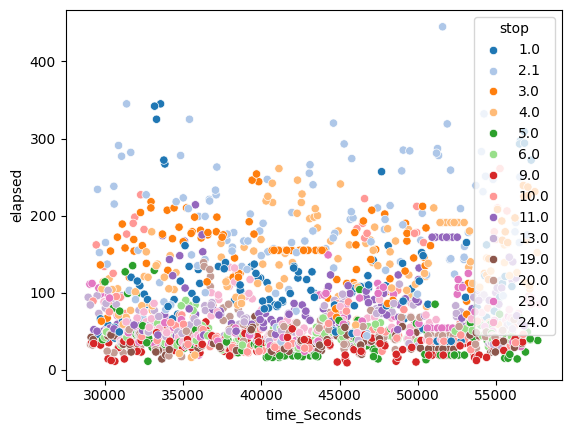

In [134]:
# print("Sample times")
sns.scatterplot(data=new_augmented_dataframe,x='time_Seconds',y='elapsed',hue='stop',palette="tab20")
plt.show()

<Axes: xlabel='stop', ylabel='time_Seconds'>

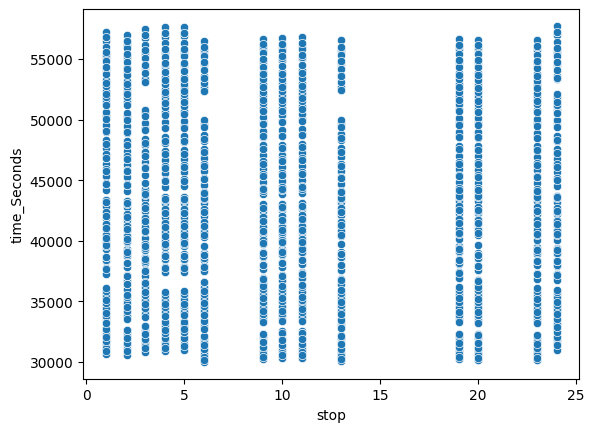

In [135]:
# plot roundtrips,
remove_none_round_trip = new_augmented_dataframe[new_augmented_dataframe['round_trip'].notnull()]
sns.scatterplot(x='stop', y='time_Seconds', data=remove_none_round_trip)


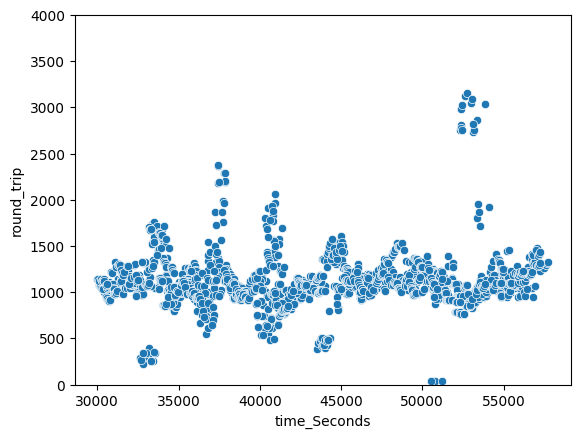

In [136]:
df_c = remove_none_round_trip[['time_Seconds','round_trip']]
sns.scatterplot(data=df_c,x='time_Seconds', y= 'round_trip')
# plt.xlim(30000,40000)
plt.ylim(0,4000)
plt.show()

In [137]:
##
## join real with synthethic, and save it
##
new_df = pd.concat([data_df,new_augmented_dataframe])
new_df
new_df.to_csv('augmented.csv',index=False)
new_augmented_dataframe.to_csv('augmented_only.csv',index=False)

In [21]:
### usar la varianza como std

### cada celda del la matriz es un roundtrip, la varianza de ese tiempo con avg de roundtrip me puede servir

### Checking if there is a correlation between roundtrips and time


Correlation between vars
               elapsed  time_Seconds  round_trip
elapsed       1.000000      0.124449    0.125686
time_Seconds  0.124449      1.000000    0.094207
round_trip    0.125686      0.094207    1.000000


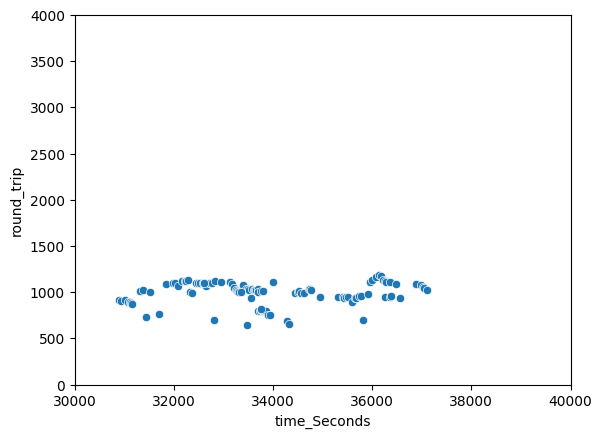

In [22]:
df_c = data_df[['elapsed', 'time_Seconds', 'round_trip']]
cor = df_c.corr()
print("Correlation between vars")
print(cor)


sns.scatterplot(data=df_c,x='time_Seconds', y= 'round_trip')
plt.xlim(30000,40000)
plt.ylim(0,4000)
plt.show()

# sns.kdeplot(x=df["elapsed"], color='blue', label="Time elapsed")
# plt.legend(loc="upper left")
# plt.title("Time elapsed distribution")
# plt.show()

# ps = pd.Series(parada_num)
# ps = ps.apply(lambda x: float(x))

# sns.scatterplot(data=df, x='stop', y='elapsed',hue='stop',palette="tab20").set_xticks(ps)
# plt.title("Time distribution for each stop from previous stop")
# plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
# plt.show()

# sns.scatterplot(data=df, x='stop', y='round_trip',hue='stop',palette="tab20").set_xticks(ps)
# plt.title("Time distribution for each stop from same stop")
# plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
# plt.show()

In [60]:
list_of_timestamps

[28800, 32400, 36000, 39600, 43200, 46800, 50400, 54000]